### 39. Methodenseminar
## Big Data Module II: Introduction to Social Network Science with Python
# 3.1 Small-World Networks (Demo)
**Author**: <a href='https://www.gesis.org/person/haiko.lietz'>Haiko Lietz</a>, GESIS - Leibniz Institute for the Social Sciences

**Date**: 17 July 2019

**Library versions**: ``networkx`` 2.2 ([documentation](https://networkx.github.io/documentation/))

***
## Table of Contents
#### [3.1.1 Erdős-Rényi Graphs](#3_1_1)
#### [3.1.2 Navigable Small-World Graphs](#3_1_2)
[3.1.2.1 Two-Dimensional Grid Without Long-Range Connections](#3_1_2_1) |
[3.1.2.2 Two-Dimensional Grid With One Long-Range Connection Per Node and Optimal Navigation](#3_1_2_2)
#### [3.1.3 Quantifying Emergence](#3_1_3)
[3.1.3.1 Static Co-Authorship Graph](#3_1_3_1) |
[3.1.3.2 Dynamic Co-Authorship Graph](#3_1_3_2)
#### [3.1.4 Graph Densification](#3_1_4)
***

## 3.1.1 Erdős-Rényi Graphs <a name='3_1_1'></a>

In [1]:
import networkx as nx

In [2]:
G = nx.gnm_random_graph(n=100, m=50)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


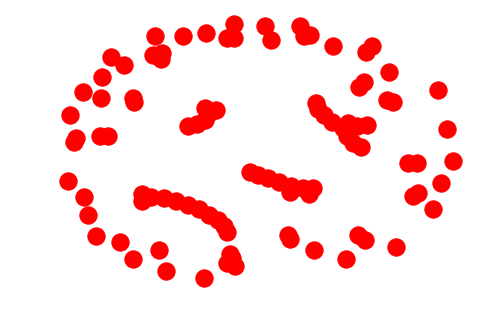

In [4]:
nx.draw(G)

In [5]:
G.is_directed()

False

In [6]:
list(nx.nodes_with_selfloops(G))

[]

In [7]:
nx.density(G)

0.010101010101010102

#### Largest Connected Component

In [8]:
G_lcc = max(nx.connected_component_subgraphs(G), key=len)

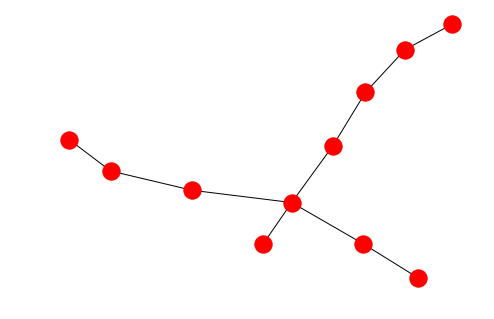

In [9]:
nx.draw(G_lcc)

In [10]:
def lcc(G):
    return max(nx.connected_component_subgraphs(G, copy=True), key=len)

In [11]:
L_lcc = []
for m in range(0, 200):
    G = nx.gnm_random_graph(100, m)
    G_lcc = lcc(G)
    L_lcc.append(G_lcc.number_of_nodes())

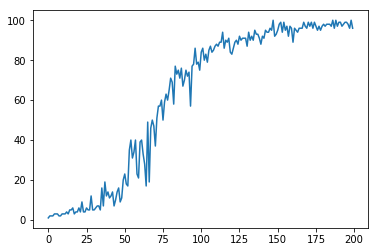

In [12]:
plt.plot(range(0, 200), L_lcc)

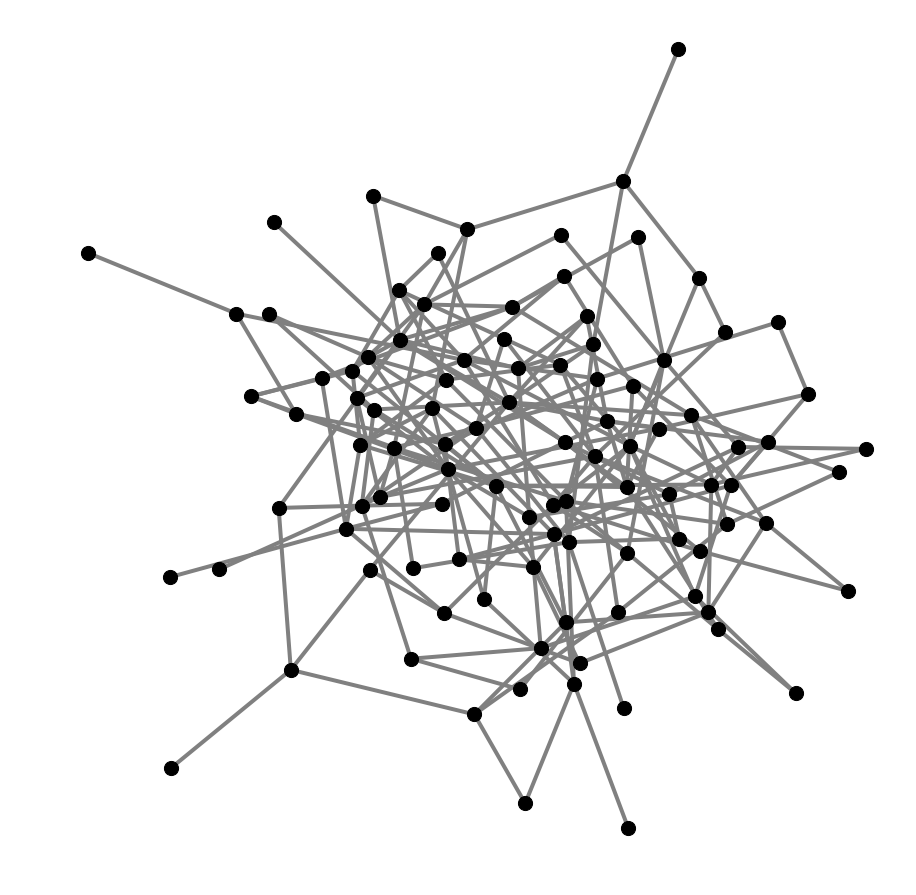

In [325]:
G = nx.gnm_random_graph(n=100, m=200, seed=9)
pos = nx.spring_layout(G, seed=0)
plt.figure(figsize=(12, 12))
nx.draw(G, pos=pos, node_size=200, node_color='black', edge_color='gray', width=4)
plt.savefig('ER/n100_m200.png')

In [13]:
G = nx.gnm_random_graph(100, 200)

In [14]:
G_lcc = lcc(G)

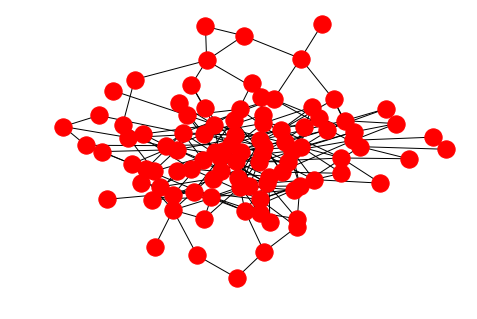

In [15]:
nx.draw(G_lcc)

In [16]:
nx.density(G_lcc)

0.04122861265718408

In [17]:
nx.average_clustering(G_lcc)

0.05065736732403399

In [18]:
nx.average_shortest_path_length(G_lcc)

3.3712636569779426

In [19]:
nx.diameter(G_lcc)

7

In [20]:
nx.degree_assortativity_coefficient(G)

-0.1178471421970611

## 3.1.2 Navigable Small-World Graphs <a name='3_1_2'></a>

The ``navigable_small_world_graph()`` function geometrically creates navigable Small-World graphs as proposed by Kleinberg.

### 3.1.2.1 Two-Dimensional Grid Without Long-Range Connections <a name='3_1_2_1'></a>

In [21]:
D = nx.navigable_small_world_graph(n=5, p=2, q=0, dim=2, seed=0)

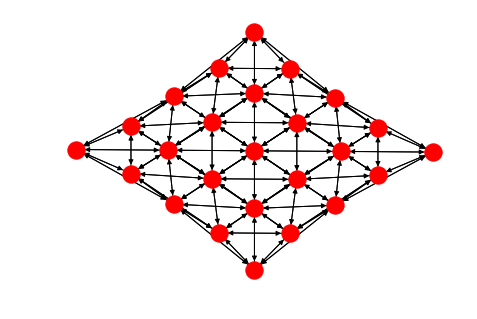

In [22]:
nx.draw_spectral(D)

In [23]:
D = nx.navigable_small_world_graph(n=25, p=2, q=0, dim=2, seed=0)

In [24]:
nx.density(D)

0.01795897435897436

In [25]:
nx.average_clustering(D)

0.47452259740260117

In [26]:
nx.average_shortest_path_length(D)

8.583733333333333

In [27]:
nx.diameter(D)

24

In [28]:
nx.degree_assortativity_coefficient(D)

0.6203992435547963

#### Small-Worldliness

In [29]:
G = D.to_undirected()

In [30]:
c = nx.average_clustering(G)
c

0.47452259740260117

In [31]:
l = nx.average_shortest_path_length(G)
l

8.583733333333333

In [32]:
L_c = []
L_l = []
for i in range(0, 10):
    G_rnd = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
    L_c.append(nx.average_clustering(G_rnd))
    L_l.append(nx.average_shortest_path_length(G_rnd))

In [33]:
import numpy as np

In [34]:
c_r = np.mean(L_c)
c_r

0.01785368317502333

In [35]:
l_r = np.mean(L_l)
l_r

2.9128841025641026

In [36]:
c/c_r

26.578414815069724

In [37]:
l/l_r

2.9468159497926454

In [38]:
(c/c_r)/(l/l_r)

9.019367095844562

### 3.1.2.2 Two-Dimensional Grid With One Long-Range Connection Per Node and Optimal Navigation <a name='3_1_2_2'></a>

In [39]:
D_nav = nx.navigable_small_world_graph(n=5, p=2, q=1, r=2, dim=2, seed=0)

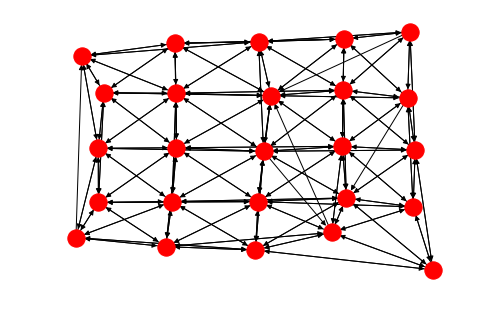

In [40]:
nx.draw_spectral(D_nav)

In [41]:
D_nav = nx.navigable_small_world_graph(n=25, p=2, q=1, r=2, dim=2, seed=0)

#### Small-Worldliness

In [42]:
G_nav = D_nav.to_undirected()

In [43]:
c_nav = nx.average_clustering(G_nav)
c_nav

0.41261305805305837

In [44]:
l_nav = nx.average_shortest_path_length(G_nav)
l_nav

3.9357897435897438

In [45]:
def sw_random(G, iter=10):
    L_c = []
    L_l = []
    for i in range(0, iter):
        G_rnd = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
        L_c.append(nx.average_clustering(lcc(G_rnd)))
        L_l.append(nx.average_shortest_path_length(lcc(G_rnd)))
    c_r = np.mean(L_c)
    l_r = np.mean(L_l)
    return c_r, l_r

In [46]:
c_nav_r, l_nav_r = sw_random(G_nav, iter=10)

In [47]:
c_nav/c_nav_r

20.494621275587377

In [48]:
l_nav/l_nav_r

1.4010007526363726

In [49]:
(c_nav/c_nav_r)/(l_nav/l_nav_r)

14.628558362314259

## 3.1.3 Quantifying Emergence <a name='3_1_3'></a>

#### The Social Network Science Dataset

<img src='images/model_sns.png'>

In [50]:
import pandas as pd

In [51]:
authorships = pd.read_csv('../data/sns/authorships.txt', header='infer', delimiter='\t', encoding='utf-8')
authorships['publication_id'] = authorships['publication_id'].astype('str')
authorships.head()

,publication_id,author_id
0,0,0
1,1,1
2,2,2
3,2,3
4,3,4


### 3.1.3.1 Static Co-Authorship Graph <a name='3_1_3_1'></a>

<img src='images/sns_coauthorship.jpg'>

In [52]:
A = nx.Graph(name='Authorships')

In [53]:
A.add_edges_from(authorships.values)

In [54]:
from networkx.algorithms import bipartite

In [55]:
C = bipartite.weighted_projected_graph(A, set(authorships['author_id']))

In [56]:
C_lcc = lcc(C)

In [57]:
nx.density(C_lcc)

0.0005173128453918744

In [58]:
C_lcc.number_of_nodes()/C.number_of_nodes()

0.2779569538603304

In [59]:
c = nx.average_clustering(C_lcc)
c

0.7541001817332154

In [60]:
#l = nx.average_shortest_path_length(C_lcc)
l = 9.811953179249574

In [61]:
def sw_random(G, iter=10):
    L_c = []
    L_l = []
    if iter > 0:
        for i in range(0, iter):
            G_rnd = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
            L_c.append(nx.average_clustering(lcc(G_rnd)))
            L_l.append(nx.average_shortest_path_length(lcc(G_rnd)))
        c_r = np.mean(L_c)
        l_r = np.mean(L_l)
    else:
        c_r = nx.density(G)
        l_r = np.log(G.number_of_nodes())
    return c_r, l_r

In [62]:
c_r, c_l = sw_random(C_lcc, iter=0)
c_r, c_l

(0.0005173128453918744, 9.446913343602054)

In [63]:
c/c_r

1457.725607339153

In [64]:
l/l_r

3.3684667270532596

In [65]:
(c/c_r)/(l/l_r)

432.7564216774597

In [66]:
nx.degree_assortativity_coefficient(C_lcc)

0.7733759783505115

### 3.1.3.2 Dynamic Co-Authorship Graph <a name='3_1_3_2'></a>

In [67]:
authorships = pd.read_csv('../data/sns/authorships.txt', header='infer', delimiter='\t', encoding='utf-8')

In [68]:
publications = pd.read_csv('../data/sns/publications.txt', header='infer', delimiter='\t', encoding='utf-8')
publications['time'] = (3*np.floor(publications['time']/3)+(3-1)).astype('int')
publications.head()

,publication_id,publication,time,type,domain_id
0,0,HANIFAN_1916_A_130,1916,ARTICLE,0
1,1,YULE_1925_P_21,1925,ARTICLE,1
2,2,KERMACK_1927_P_700,1928,ARTICLE,1
3,3,ECKART_1936_P_211,1937,ARTICLE,2
4,4,COASE_1937_E_386,1937,ARTICLE,1


In [69]:
authorships = pd.merge(left=authorships, right=publications[['publication_id', 'time']], on='publication_id')
authorships['publication_id'] = authorships['publication_id'].astype('str')
authorships.head()

,publication_id,author_id,time
0,0,0,1916
1,1,1,1925
2,2,2,1928
3,2,3,1928
4,3,4,1937


In [70]:
years = list(authorships['time'].drop_duplicates())
years[:13]

[1916, 1925, 1928, 1937, 1940, 1943, 1946, 1949, 1952, 1955, 1958, 1961, 1964]

In [71]:
L_C = []
for year in years:
    df = authorships[authorships['time'] == year][['publication_id', 'author_id']]
    A = nx.Graph()
    A.add_edges_from(df.values)
    L_C.append(bipartite.weighted_projected_graph(A, set(df['author_id'])))

#### Largest Connected Component

In [72]:
L_n = []
L_m = []
L_n_lcc = []
L_m_lcc = []
for i in range(0, len(L_C)):
    L_n.append(L_C[i].number_of_nodes())
    L_m.append(L_C[i].number_of_edges())
    L_n_lcc.append(lcc(L_C[i]).number_of_nodes())
    L_m_lcc.append(lcc(L_C[i]).number_of_edges())

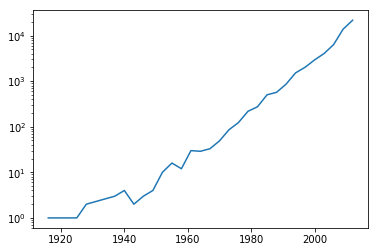

In [73]:
plt.plot(years, L_n)
plt.yscale('log')

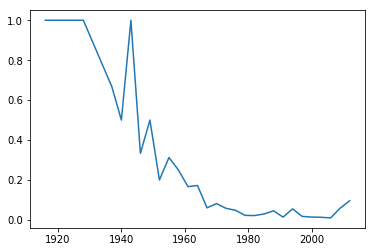

In [74]:
plt.plot(years, np.array(L_n_lcc)/np.array(L_n))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


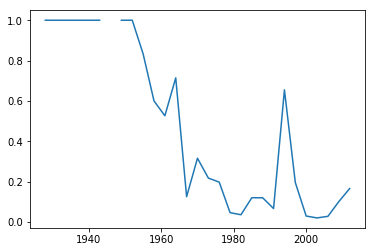

In [75]:
plt.plot(years, np.array(L_m_lcc)/np.array(L_m))

#### Small-Worldliness

In [76]:
L_c = []
L_l = []
for i in range(0, len(L_C)):
    L_c.append(nx.average_clustering(lcc(L_C[i])))
    L_l.append(nx.average_shortest_path_length(lcc(L_C[i])))

In [77]:
L_c_r = []
L_l_r = []
for i in range(0, len(L_C)):
    c_r, l_r = sw_random(lcc(L_C[i]), iter=0)
    L_c_r.append(c_r)
    L_l_r.append(l_r)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


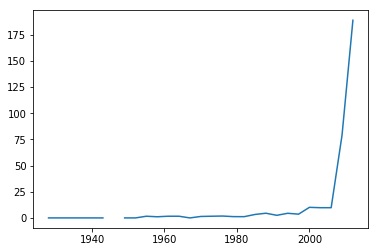

In [78]:
plt.plot(years, (np.array(L_c)/np.array(L_c_r))/(np.array(L_l)/np.array(L_l_r)))

#### Degree Correlations

In [79]:
L_r = []
for i in range(25, len(L_C)):
    L_r.append(nx.degree_assortativity_coefficient(lcc(L_C[i])))

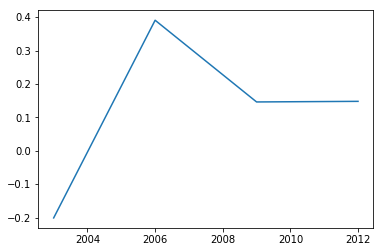

In [80]:
plt.plot(years[25:], L_r)

## 3.1.4 Graph Densification <a name='3_1_4'></a>

In [81]:
densification = pd.DataFrame({'year': years, 'nodes': L_n, 'edges': L_m})

In [82]:
densification = densification[densification['edges'] > 0]

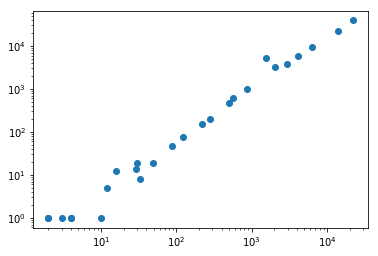

In [83]:
plt.scatter(densification['nodes'], densification['edges'])
plt.xscale('log')
plt.yscale('log')

In [84]:
from sklearn.decomposition import PCA

In [85]:
A_densification = np.column_stack((densification['nodes'], densification['edges']))

In [86]:
A_densification_log10 = np.log10(A_densification)
pca = PCA(n_components = 2)
pca.fit(A_densification_log10)
beta = pca.components_[0, 1]/pca.components_[0, 0]
d = 10**(pca.mean_[1]-pca.mean_[0]*beta)

In [87]:
beta

1.2376981227272705

In [88]:
xfit = np.arange(1, max(A_densification[:, 0]))
yfit = d*xfit**beta

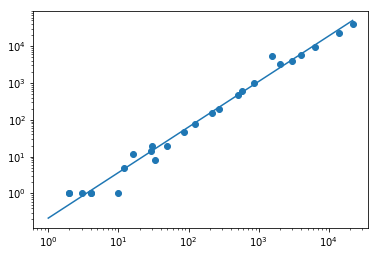

In [89]:
plt.scatter(densification['nodes'], densification['edges'])
plt.plot(xfit, yfit)
plt.xscale('log')
plt.yscale('log')